## 데이터

In [50]:
import pandas as pd
df_dc = pd.read_csv('./dummy/project_dcinside.csv')
df_dc[:1]

,_id,title,date,contents,up,down,comment[0],comment[1],comment[2],comment[3],...,comment[44],comment[45],comment[46],comment[47],comment[48],comment[49],comment[50],comment[51],comment[52],comment[53]
0,65d87bac24e72d643e1e4bce,갑자기든 생각인데 신섬 반점 문신으로 가릴수있지않을까?,2024.02.23 18:32:18,피부랑 똑같은색으로 점있는 부분만 문신하면 티는 조금 나겠지만 조금은 희미해질듯,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_dc['contents_all'] = df_dc['title']+df_dc['contents']

In [52]:
df_dc['contents_all']

0      갑자기든 생각인데 신섬 반점 문신으로 가릴수있지않을까?피부랑 똑같은색으로 점있는 부...
1      영국, 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지https://www.ne...
2      검사 받는 병원 근처 지역 병원으로 바꿈계속 서울로 정기검진 받으러 가다가 어제를 ...
3                            섬유종 수술은 아산병원이 젤 나음?좀 큰 부위인데
4      신섬 증상 별로 안 심하면 코셀루고 약 못 먹나?엄청 심한건 아닌 거 같은데...먹...
                             ...                        
484    희귀병 걸렸다ㅜ베체트 ㅆㅂ 이거 뭐야?\n\n확진줘놓고 아프면 오라니 이게 말이냐?...
485    희귀병이니 갤마저 글이 희귀하네...자주 들를게 나도 희귀병 환우얍 흑 \n- dc...
486    힘들다병명찾기 몇년째인지\n정말 사람들 말대로 다 내 머릿속에 있는건지\n아님 정말...
487     좋은 일 하십니다실제로 환우들이 여기를 사용할지는 모르겠다만 모두들 힘내십쇼. 화이팅!
488                                                 발도잔꾹
Name: contents_all, Length: 489, dtype: object

In [56]:
df_dc.drop(columns = ['title','contents', '_id'], inplace=True)

KeyError: "['title', 'contents', '_id'] not found in axis"

In [58]:
df_dc[:1]

,date,up,down,comment[0],comment[1],comment[2],comment[3],comment[4],comment[5],comment[6],...,comment[46],comment[47],comment[48],comment[49],comment[50],comment[51],comment[52],comment[53],contents_all,comments
0,2024.02.23 18:32:18,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,갑자기든 생각인데 신섬 반점 문신으로 가릴수있지않을까?피부랑 똑같은색으로 점있는 부...,NaN


In [60]:
comments = []
for x in range(53):
    comments.append(f'comment[{x}]')

In [61]:
df_dc['comments'] = df_dc['comment[0]']
for x in range(1,len(comments)) :
    df_dc['comments']+df_dc[f'comment[{x}]']
df_dc['comments']

0                                                    NaN
1                                        너 살아 있었구나\n다행이다
2                                                    NaN
3                         음..... 그런 듯 나도 9cm 종양 아산에서 제거함
4                                   카페에서 부작용 보니까 엄청 심하던데
                             ...                        
484    헐....힘내요..나도 섬유종이라는 희귀변잇는데 병원에서 답도 안주고 지들 책임안지...
485                                      무슨 병?? - dc App
486    힘들수록 네 자신을 믿고 사랑해야해 ~! 난 1년 전부터 있던 증상 한달 전쯤에야 ...
487                                                ㅎㅇㅌ~!
488                                                  NaN
Name: comments, Length: 489, dtype: object

In [62]:
df_dc.drop(columns = comments, inplace=True)

In [63]:
df_dc = df_dc.dropna(subset=['contents_all'])

In [64]:
import re
patterns = '(official|때문에 |말한다|위해서|한다| 통해 |하다|이를|이나|이다|있다|으로 |가기|가끔|가든|이번|제발|병신|시발|게이|dc|씨발|ㅆㅂ|있게|있는 |위해|되어|하기 |\\n|했 |할|되고|되는|된다|까지|하지|같다|같은|같아|하여|할수|하고|하는이다|있는|의 |것|갓 | 간  |\\n|를 |\.|\, |로 |좆|은 |을 |에 |수 | 수|이 |할 |나 |\(|\)|\-)|때'
series = []
for contents in df_dc['contents_all']:
    text_regex = re.sub(pattern=patterns,repl=' ',string=contents)
    series.append(text_regex)
series


<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
/tmp/ipykernel_40200/2017433346.py:2: DeprecationWarning: invalid escape sequence '\.'
  patterns = '(official|때문에 |말한다|위해서|한다| 통해 |하다|이를|이나|이다|있다|으로 |가기|가끔|가든|이번|제발|병신|시발|게이|dc|씨발|ㅆㅂ|있게|있는 |위해|되어|하기 |\\n|했 |할|되고|되는|된다|까지|하지|같다|같은|같아|하여|할수|하고|하는이다|있는|의 |것|갓 | 간  |\\n|를 |\.|\, |로 |좆|은 |을 |에 |수 | 수|이 |할 |나 |\(|\)|\-)|때'


['갑자기든 생각인데 신섬 반점 문신 가릴수있지않을까?피부랑 똑 색 점 부분만 문신하면 티는 조금 나겠지만 조금 희미해질듯',
 '영국 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지https://www newsthevoice com/news/articleView html?idxno=36427\\n 영국 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지\\n영국 의약품규제청 플루오로퀴놀론계열 항생제가 다른 계열 항생제 부적절한 경우에만 처방토록 아예 1차요법 사용 금지시켰다 영국 의약품규제청 MHRA 는 지난 22일 경구 주사 또는 흡입 통해 전신 투여  플루오로키놀론계열 항생제는 사용하기 적합한 다른 항생제가 없는 경우 제한키 했다고 발표했다 이는 2019년 일부 심각  않 감염  전립선염 등 비세균성 질환 대한 1차 사용금지에도 불구 이상반응 보고가 지속  처방패턴 변화가 없음 따라 시행  추가조치다 MHRA는   조치는 부작용 줄이기   진\\nwww newsthevoice com\\n\\n\\nhttps://www yakup com/news/index html?mode=view&cat=16&nid=281566\\nEU 플루오로퀴놀론系 항생제 제한적 사용 요망\\n\\n\\n\\n 아는 놈 알텐데 약 잘못 먹고 인생 조진 놈임',
 '검사 받는 병원 근처 지역 병원 바꿈계속 서울 정기검진 받으러 가다가 어제 마지막 그냥 집근처  지방 대학병원 가는거오 했음  \\n\\n뭐 지방 병원도 큰 차이는 없겠지?',
 '섬유종 술 아산병원 젤 나음?좀 큰 부위인데',
 '신섬 증상 별 안 심하면 코셀루고 약 못 먹나?엄청 심한건 아닌 거  데   먹어보고싶다  \\n\\n작년 여름엔 머리랑 눈 너무 아파서 신경과 가서 CT찍었더니\\n뇌 종양   그랬고\\n\\n쇄골 ㅜ등에도 종양 새 생기고 있던데\\n\\n증상 엄청 심한 환우분들만 먹는거야??\\n\\n일단 소아 환우들 먼저 처방 가능한거  데  \\n\\n\\n      App',
 '루게릭병 전조증상 

In [65]:
df_dc['contents_all'].loc[0]

'갑자기든 생각인데 신섬 반점 문신으로 가릴수있지않을까?피부랑 똑같은색으로 점있는 부분만 문신하면 티는 조금 나겠지만 조금은 희미해질듯'

In [66]:
df_dc['contents_all']=pd.Series(data=series)
df_dc = df_dc.dropna(subset=['contents_all'])

/tmp/ipykernel_40200/3387206285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc['contents_all']=pd.Series(data=series)


### Tokenizing

In [67]:
# 불용어 리스트 생성 (예시)
stopwords = ['자꾸','하루','신경섬유','지금','생각','이제','','갑자기','여기','사람','한번','오늘','그냥','희귀','가기','새끼','진짜' , '가끔','가든','가야','이번','제발','병신','시발','게이','dc','app','official','씨발','ㅆㅂ', '가', '고','좆', '을', '를', '이', '는']
from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun"], stopword=stopwords):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅏ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword

    ]

In [68]:
# tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df=0.95, min_df=2)

In [69]:
features = tfidfVectorizer.fit_transform(df_dc['contents_all'])
features.toarray()[:2]

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 군집 시각화 -> 자체 필터링 위함

In [290]:
import pyLDAvis
import pyLDAvis.lda_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [291]:
components_3  = LatentDirichletAllocation(n_components=3, n_jobs=-1) # n_components => topic 가짓수 결정 / n_jobs =>성능높이기
components_3.fit(features)

LatentDirichletAllocation(n_components=3, n_jobs=-1)

In [292]:
vis = pyLDAvis.lda_model.prepare(components_3, features, tfidfVectorizer) # 토픽모델, 교육이 끝난 값(행렬형태), 교육모델

In [327]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis) # PCA - 차원축소

## 군집분석

In [294]:
dictionary_list = tfidfVectorizer.get_feature_names_out(features)
dictionary_list

array(['가격', '가능', '가능성', '가뜩', '가면', '가슴', '가위', '가입', '가장', '가정', '가족',
       '가지', '각자', '간다', '감각', '감기', '감사', '감염', '감정', '갑상선', '강직', '개발',
       '개뿔', '개새끼', '개설', '개월', '개인', '개정', '개패', '객관', '갤러리', '거기', '거나',
       '거대', '거리', '거림', '거울', '거의', '거임', '거절', '거지', '걱정', '건가', '건강',
       '건강검진', '검사', '검색', '검진', '게다가', '겨우', '겨울', '결과', '결론', '결정',
       '결혼', '경계', '경우', '경험', '계단', '계속', '계열', '고등학교', '고딩', '고민', '고생',
       '고요', '고작', '고통', '고함', '곳곳', '공감', '공부', '공유', '공익', '공장', '공제',
       '공지', '과거', '과도', '과민성', '관련', '관리', '관절', '관찰', '교통사고', '교환',
       '구라', '국가', '국내', '국민', '군대', '군데', '군의관', '굳이', '궁금', '규칙', '그거',
       '그게', '그닥', '그동안', '그땐', '극복', '근무', '근육', '근처', '금방', '금수', '금액',
       '금지', '급식', '급여', '긍정', '기계', '기능', '기도', '기록', '기만', '기분', '기억',
       '기적', '기준', '기타', '기형', '기회', '긴장', '꾀병', '끼리', '나라', '나름', '나은',
       '나이', '나좀', '나중', '나타남', '난치', '난치병', '남자', '남자친구', '남지', '남친',
       '낫다', '내내', '내년', '내일', '너희', '네이버', '년도', '

In [295]:
components_3.components_

array([[1.60696038, 0.33458879, 0.34368066, ..., 0.82383037, 5.37152834,
        1.14392709],
       [0.37692813, 0.33512547, 0.34213836, ..., 0.33905275, 5.1890244 ,
        0.34407186],
       [0.33527483, 1.7061634 , 0.93460588, ..., 0.40847626, 0.40051785,
        0.36244643]])

In [296]:
topics_output = components_3.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)

In [297]:
import numpy as np
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1)

In [298]:
df_topics_score['sentences'] = df_dc['contents_all']

In [286]:
df_topics_score

,0,1,2,dominant_topic_number,sentences
0,0.770718,0.118080,0.111201,0,갑자기든 생각인데 신섬 반점 문신 가릴수있지않을까?피부랑 똑 색 점 부분만 문신하면...
1,0.441859,0.077259,0.480882,2,영국 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지https://www new...
2,0.826894,0.083697,0.089409,0,검사 받는 병원 근처 지역 병원 바꿈계속 서울 정기검진 받으러 가다가 어제 마지막 ...
3,0.135883,0.737141,0.126976,1,섬유종 술 아산병원 젤 나음?좀 큰 부위인데
4,0.170977,0.745402,0.083621,1,신섬 증상 별 안 심하면 코셀루고 약 못 먹나?엄청 심한건 아닌 거 데 먹어보...
...,...,...,...,...,...
480,0.167731,0.663345,0.168925,1,어깨슬랩인데 희귀케이스래재활센터 1년간다니가옸는데 진전이없어 \n\n편돌이하면서 쥐...
481,0.663506,0.168212,0.168282,0,갤러리는 항상 정전 이었으면 하는 갤러리 나도 희귀 질환 데 눈팅해보니 정...
482,0.606304,0.064470,0.329227,0,희귀병 걸렸다ㅜ베체트 이거 뭐야?\n\n확진줘놓고 아프면 오라니 이게 말이냐?방구냐?
483,0.769000,0.117084,0.113915,0,희귀병이니 갤마저 글 희귀하네 자주 들를게 나도 희귀병 환우얍 흑 \n ...


In [330]:
## 상위 단어 추출
## 0 확률 1은 dictionary
topics_list = list()
for topic in components_3.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)


topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2']]
df_topics_keywords = pd.DataFrame(topics_list_add)

인생 자살 병원 치료
종양 피부 환자 희귀질환
카페 증상 느낌 관련


### 분석결과 : 군집크기 0>3>1>4>2 순
- topic0 - 부정적 감정에 대한 토픽
- topic1 - 치료에 대한 토픽
- topic2 - 증상 관련 커뮤니티(카페)에 대한 토픽

In [331]:
df_topics_keywords

,0,1,2
0,인생 자살 병원 치료,종양 피부 환자 희귀질환,카페 증상 느낌 관련
1,Topic0,Topic1,Topic2


In [332]:
df_dc['date'] = pd.to_datetime(df_dc['date'])
df_dc['date'] = df_dc['date'].dt.date
df_topics_score['date'] = df_dc['date'] 
df_topics_score

,0,1,2,dominant_topic_number,sentences,date,date_datetime_year
0,0.281861,0.602787,0.115351,1,갑자기든 생각인데 신섬 반점 문신 가릴수있지않을까?피부랑 똑 색 점 부분만 문신하면...,2024-02-23,2024.0
1,0.094300,0.832089,0.073612,1,영국 부작용 이슈 퀴놀론계 항생제 모든질환 1차사용 금지https://www new...,2024-02-21,2024.0
2,0.368947,0.083030,0.548024,2,검사 받는 병원 근처 지역 병원 바꿈계속 서울 정기검진 받으러 가다가 어제 마지막 ...,2024-02-21,2024.0
3,0.122687,0.733853,0.143460,1,섬유종 술 아산병원 젤 나음?좀 큰 부위인데,2024-02-17,2024.0
4,0.199147,0.695585,0.105268,1,신섬 증상 별 안 심하면 코셀루고 약 못 먹나?엄청 심한건 아닌 거 데 먹어보...,2024-02-16,2024.0
...,...,...,...,...,...,...,...
480,0.167900,0.167919,0.664181,2,어깨슬랩인데 희귀케이스래재활센터 1년간다니가옸는데 진전이없어 \n\n편돌이하면서 쥐...,2019-11-11,2019.0
481,0.167805,0.664314,0.167880,1,갤러리는 항상 정전 이었으면 하는 갤러리 나도 희귀 질환 데 눈팅해보니 정...,2019-10-24,2019.0
482,0.077060,0.061617,0.861323,2,희귀병 걸렸다ㅜ베체트 이거 뭐야?\n\n확진줘놓고 아프면 오라니 이게 말이냐?방구냐?,2019-10-15,2019.0
483,0.111789,0.776450,0.111761,1,희귀병이니 갤마저 글 희귀하네 자주 들를게 나도 희귀병 환우얍 흑 \n ...,2019-08-08,2019.0


In [333]:
pivot_table = pd.pivot_table(data=df_topics_score,
               values='sentences',
               index='dominant_topic_number',
               aggfunc='count')
pivot_table # 군집의 크기는 0>3>1>4>2 순으로 많다.

,sentences
dominant_topic_number,
0,175
1,151
2,157


## 시계열에 따른 게시물 빈도수 시각화

In [334]:
df_dc.columns

Index(['date', 'up', 'down', 'comment[53]', 'contents_all', 'comments',
       'date_datetime', 'date_datetime_date', 'date_quarter_2023',
       'date_quarter_2024', 'date_month_2023', 'date_month_2024',
       'date_datetime_year'],
      dtype='object')

In [335]:
df_dc['date'] = pd.to_datetime(df_dc['date'])
df_dc['date_datetime_year'] = df_dc['date'].dt.year

### 전체 게시물의 언급량 추이

In [336]:
pivot_table_by_date = pd.pivot_table(data=df_dc,
               values='contents_all',
               index='date_datetime',
               aggfunc='count')
pivot_table_by_date

,contents_all
date_datetime,
2019,8
2020,28
2021,74
2022,106
2023,251
2024,18


In [337]:
list_datetime = pivot_table_by_date.index.tolist()

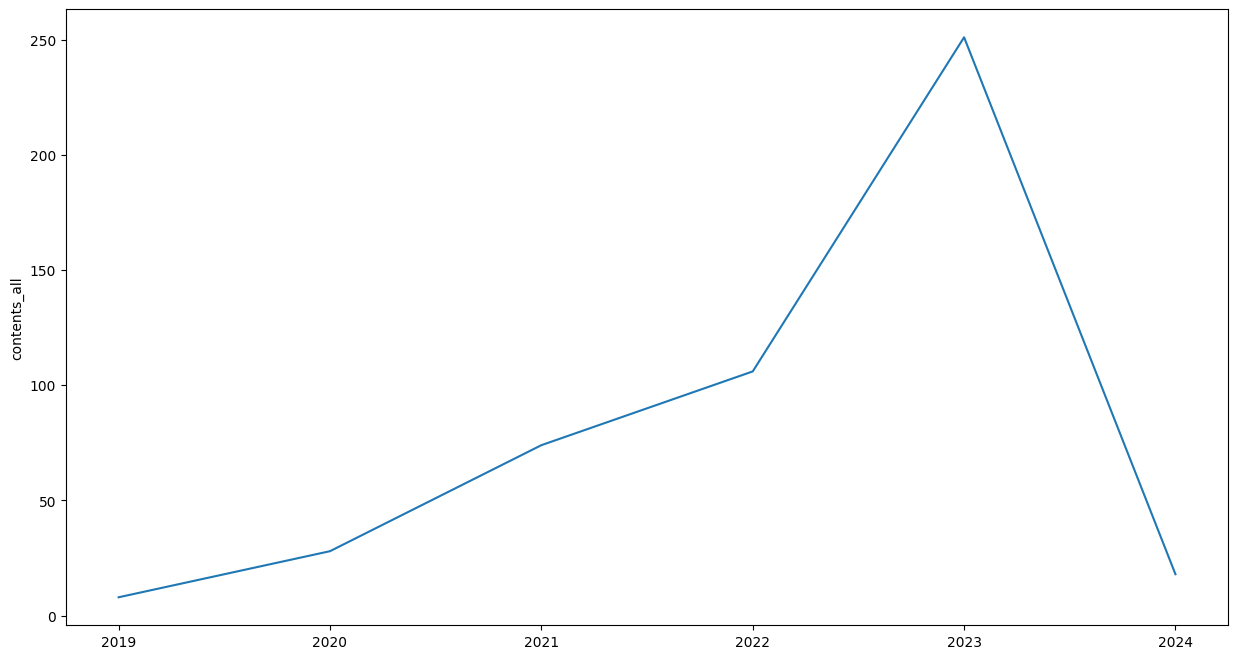

In [338]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_table_by_date, x=list_datetime, y='contents_all')
plt.show()

### 2023/2024의 월별 언급량 추이

In [339]:
df_dc['date'] = pd.to_datetime(df_dc['date'])
df_dc['date_month_2023'] = df_dc.query('20240101>date>20230101')['date'].dt.month
df_dc['date_month_2024'] = df_dc.query('20250101>date>20240101')['date'].dt.month

#### 2023

In [340]:
pivot_table_by_month_2023 = pd.pivot_table(data=df_dc.query('20240101>date>20230101'),
               values='contents_all',
               index='date_month_2023',
               aggfunc='count')
pivot_table_by_month_2023

,contents_all
date_month_2023,
1.0,14
2.0,21
3.0,27
4.0,13
5.0,15
6.0,28
7.0,31
8.0,20
9.0,25


In [341]:
list_datetime_2023 = pivot_table_by_month_2023.index.tolist()

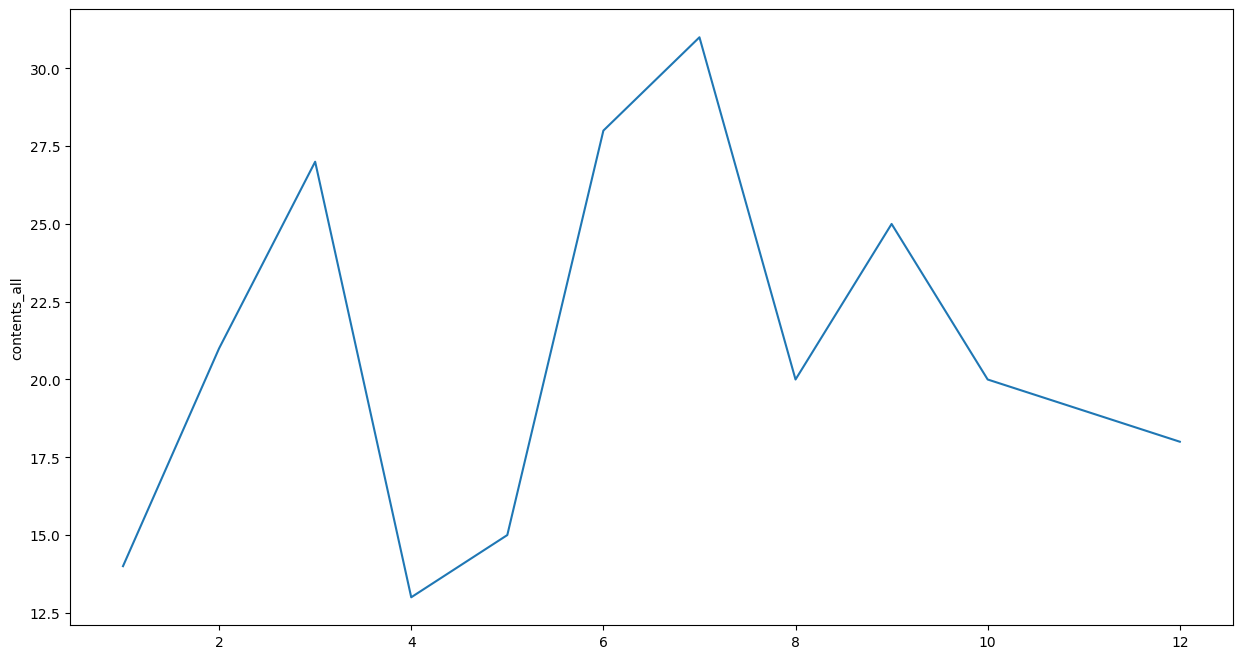

In [342]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_table_by_month_2023, x=list_datetime_2023, y='contents_all')
plt.show()

#### 2024

In [343]:
pivot_table_by_month_2024 = pd.pivot_table(data=df_dc.query('20250101>date>20240101'),
               values='contents_all',
               index='date_month_2024',
               aggfunc='count')
pivot_table_by_month_2024

,contents_all
date_month_2024,
1.0,8
2.0,9


In [344]:
list_datetime_2024 = pivot_table_by_month_2024.index.tolist()

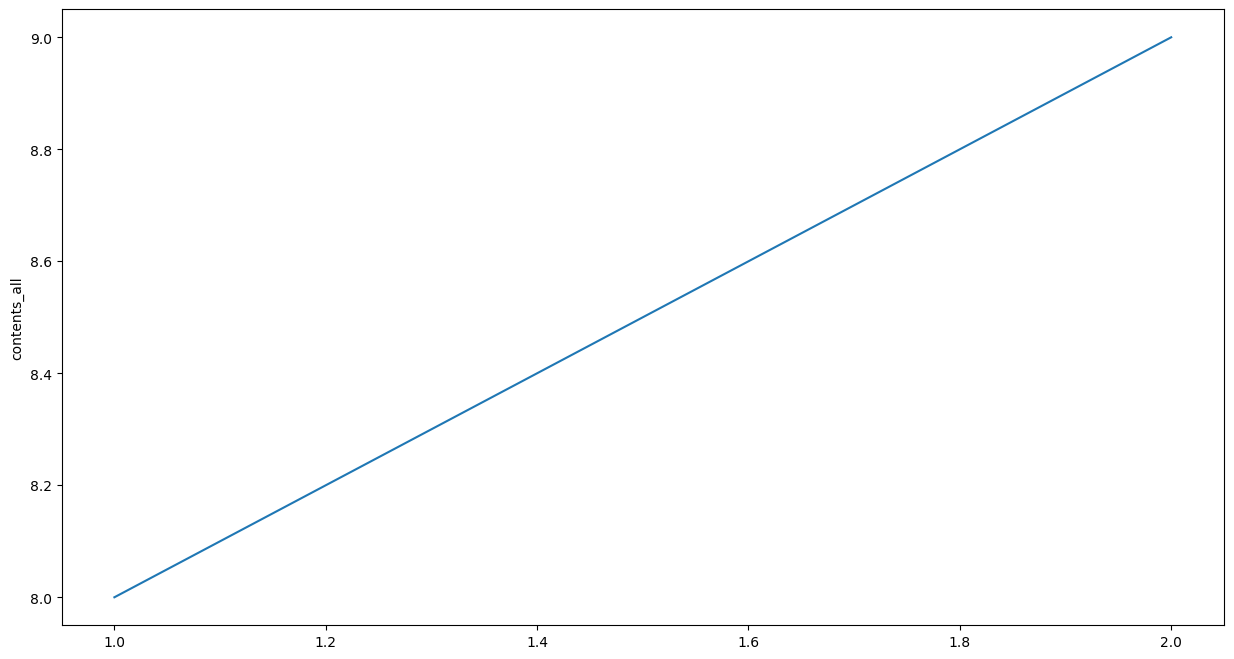

In [345]:

plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_table_by_month_2024, x=list_datetime_2024, y='contents_all')
plt.show()

#### 2023/2024 비교 시각화

In [346]:
pivot_table_by_month_2023_2024=pivot_table_by_month_2023
pivot_table_by_month_2023_2024['contents_all']

date_month_2023
1.0     14
2.0     21
3.0     27
4.0     13
5.0     15
6.0     28
7.0     31
8.0     20
9.0     25
10.0    20
11.0    19
12.0    18
Name: contents_all, dtype: int64

In [347]:
# 값 비교하기
pivot_table_by_month_2023_2024 = pivot_table_by_month_2023_2024.rename(columns={'contents_all': 'contents_all_2023'})
pivot_table_by_month_2023_2024['contents_all_2024'] = pivot_table_by_month_2024['contents_all']
pivot_table_by_month_2023_2024

,contents_all_2023,contents_all_2024
date_month_2023,,
1.0,14,8.0
2.0,21,9.0
3.0,27,NaN
4.0,13,NaN
5.0,15,NaN
6.0,28,NaN
7.0,31,NaN
8.0,20,NaN
9.0,25,NaN


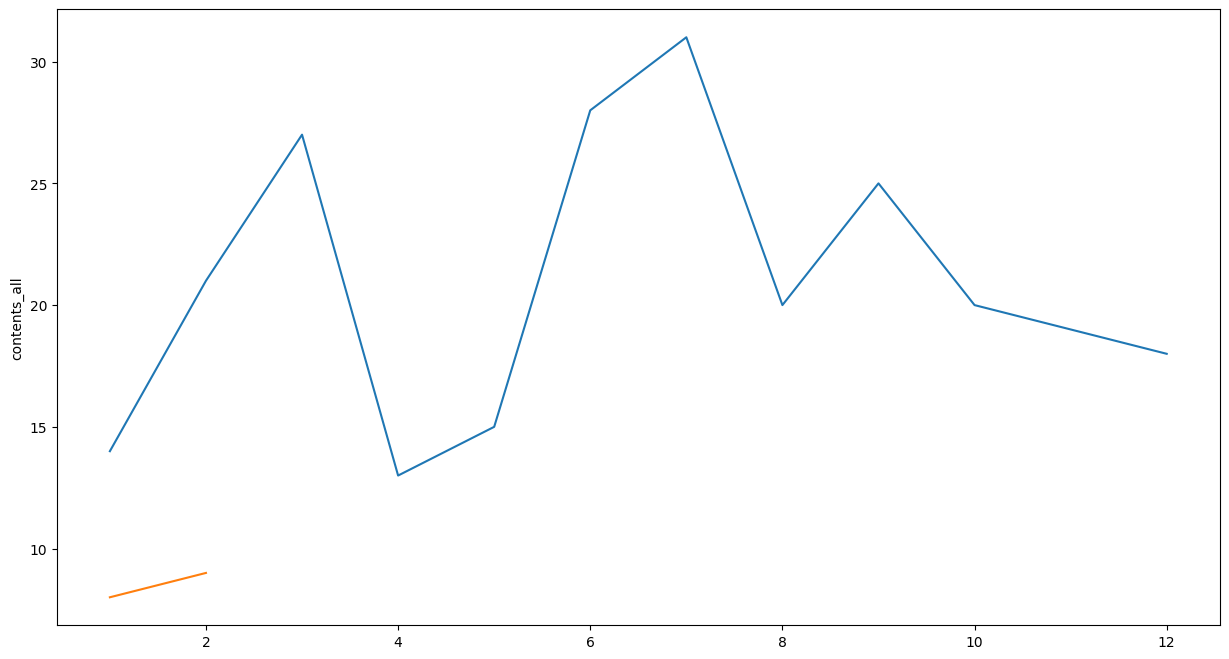

In [348]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=pivot_table_by_month_2023, x=list_datetime_2023, y='contents_all')
sns.lineplot(data=pivot_table_by_month_2024, x=list_datetime_2024, y='contents_all')
plt.show()

### 토픽 별 언급량 추이

In [349]:
df_topics_score.columns

Index([0, 1, 2, 'dominant_topic_number', 'sentences', 'date',
       'date_datetime_year'],
      dtype='object')

In [350]:
df_topics_score['date'] = pd.to_datetime(df_dc['date'])
df_topics_score['date_datetime_year'] = df_topics_score['date'].dt.year

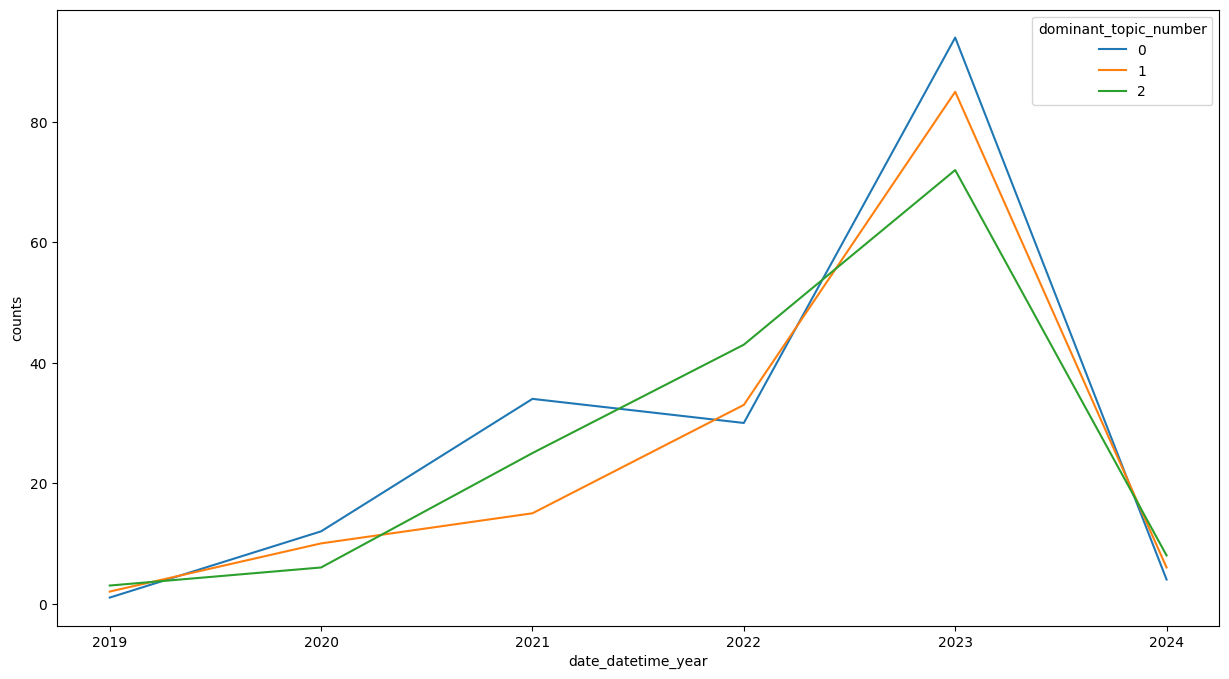

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # 날짜를 datetime 형식으로 변환
# df_topics_score['date'] = pd.to_datetime(df_dc['date'], format='%Y-%m-%d')

# 날짜와 dominant_topic_number 별로 그룹화하고, 각 날짜의 데이터 수를 계산
df_grouped = df_topics_score.groupby(['date_datetime_year', 'dominant_topic_number']).size().reset_index(name='counts')
df_grouped
# dominant_topic_number를 카테고리 형식으로 변환
df_grouped['dominant_topic_number'] = df_grouped['dominant_topic_number'].astype('category')

# 시각화
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_grouped, x='date_datetime_year', y='counts', hue='dominant_topic_number')
plt.show()
